In [2]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import Grouper
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as numpy
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from math import exp
from math import log

## Line Plot

Text(0.5, 1.0, 'Line Plot of Min Daily Temp')

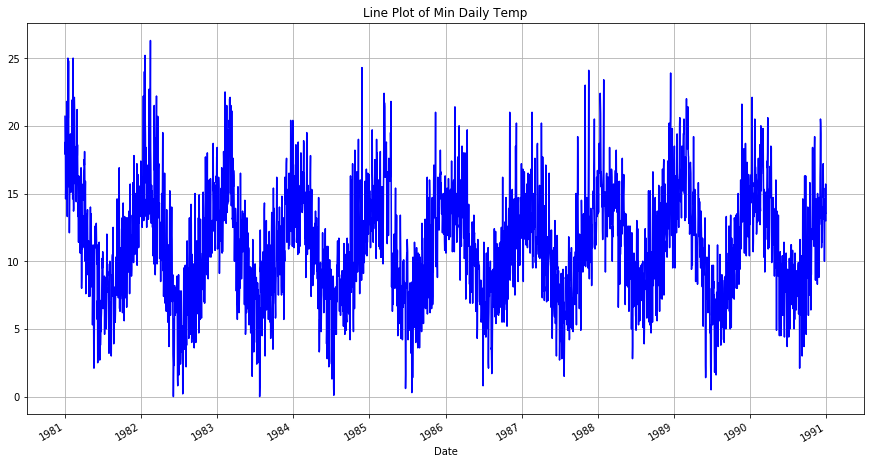

In [3]:
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
pyplot.figure(figsize = (15,8))
series.plot(c = 'b')
pyplot.grid()
pyplot.title('Line Plot of Min Daily Temp')

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for
example, to use a dashed line or dots. Below is an example of changing the style of the line to
be black dots instead of a connected line (the style=’k.’ argument). We could change this
example to use a dashed line by setting style to be ’k--’.

Text(0.5, 1.0, 'Dot Line Plot of Min Daily Temp')

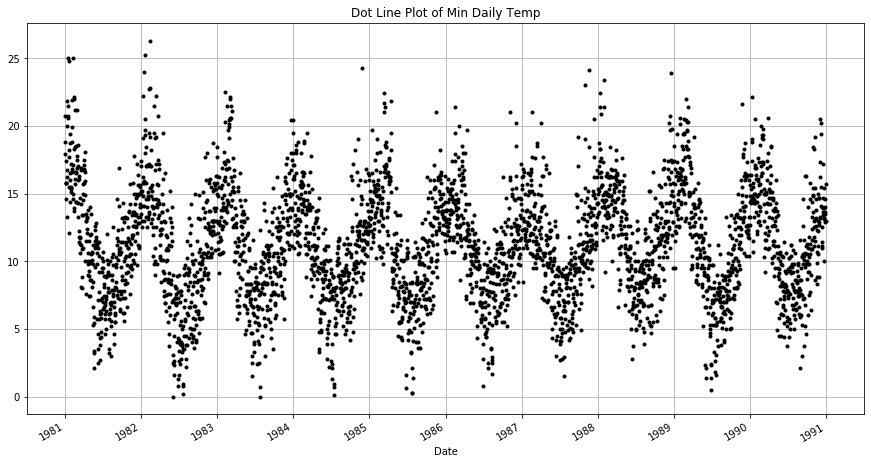

In [4]:
pyplot.figure(figsize = (15,8))
series.plot(style = 'k.')
pyplot.grid()
pyplot.title('Dot Line Plot of Min Daily Temp')

The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct comparison.

## Histogram and KDE

Text(0.5, 1.0, 'KDE of Min Daily Temp')

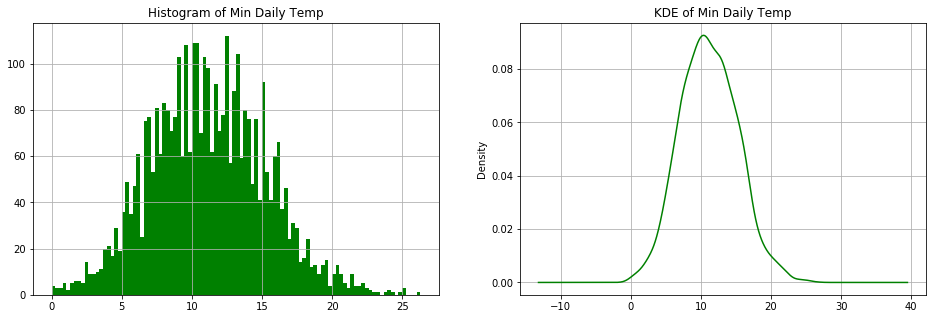

In [5]:
pyplot.figure(figsize = (16,5))
pyplot.subplot(1,2,1)
series.hist(bins = 100, color = 'g')
pyplot.title('Histogram of Min Daily Temp')

pyplot.subplot(1,2,2)
series.plot(kind = 'kde', c = 'g')
pyplot.grid()
pyplot.title('KDE of Min Daily Temp')

We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

## Normality Checks

<Figure size 720x360 with 0 Axes>

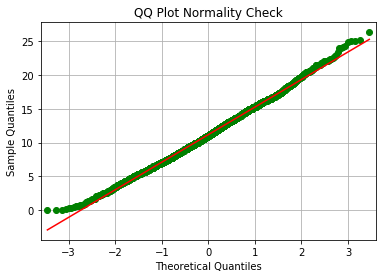

In [6]:
pyplot.figure(figsize = (10,5))
qqplot(series, line='s', c='g')
pyplot.title('QQ Plot Normality Check')
pyplot.grid()

In [7]:
## Shapiro Wilk Normality Test

# normality test
stat, p = shapiro(series)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)


## Test for Stationarity

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test1. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [8]:
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] < 0.05:
    print('Data is Stationary (reject H0)')
else:
    print('Data is Non-Stationary (fail to reject H0)')

ADF Statistic: -4.444805
p-value: 0.000247
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Data is Stationary (reject H0)


Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

## Box Plot

Below is an example of grouping the Minimum Daily Temperatures dataset by years. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison. We may also be interested in the distribution of values across months within a year.

C:\Users\vivek\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Monthly (1983) Box and Whisker Plots of the Min Daily Temps')

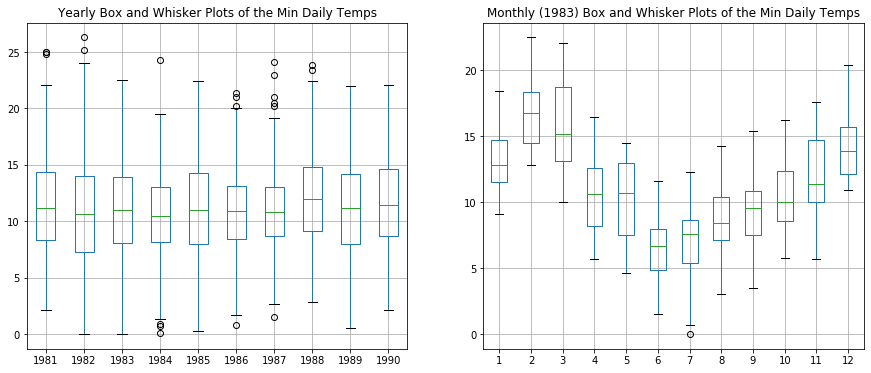

In [9]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
    
one_year = series['1983']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
    
pyplot.figure(figsize = (15,6))
pyplot.subplot(1,2,1)
years.boxplot()
pyplot.title('Yearly Box and Whisker Plots of the Min Daily Temps')

pyplot.subplot(1,2,2)
months.boxplot()
pyplot.title('Monthly (1983) Box and Whisker Plots of the Min Daily Temps')

The figure on the right shows 12 box and whisker plots, with the significant change in distribution of minimum temperatures across the months of the year from summer in January to winter in the middle of the year, and back to summer again.

## Heat Map

Observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A
heat map of this matrix can then be plotted.The plot shows the cooler minimum temperatures in the middle days of the years and
the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

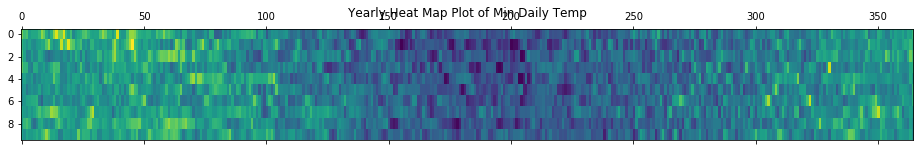

<Figure size 432x288 with 0 Axes>

In [10]:
years = years.T
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.title('Yearly Heat Map Plot of Min Daily Temp')
pyplot.show()
pyplot.tight_layout()

As with the box and whisker plot example above, we can also compare the months within a year. Below is an example of a heat map comparing the months of the year in 1983. Each column represents one month, with rows representing the days of the month from 1 to 31. Running the example shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1983.

C:\Users\vivek\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


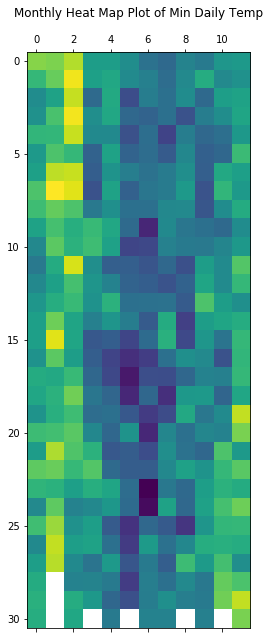

In [11]:
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.title('Monthly Heat Map Plot of Min Daily Temp')
pyplot.tight_layout()
pyplot.show()

## Lag Scatter Plot

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag=2, and so on. A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the observation at the next time step (t+1) on the y-axis.

* If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
* If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

Either relationship is good as they can be modeled.

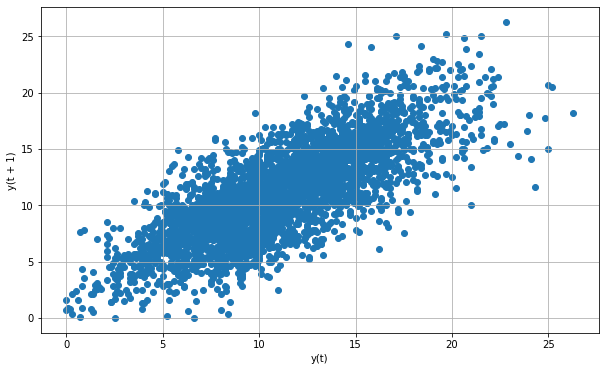

In [12]:
pyplot.figure(figsize = (10,6))
lag_plot(series)
pyplot.grid()

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore. For example, we can create a scatter plot for the observation with each value in the previous seven days. Running the example suggests the strongest relationship between an observation with its lag=1 value, but generally a good positive correlation with each value in the last week.

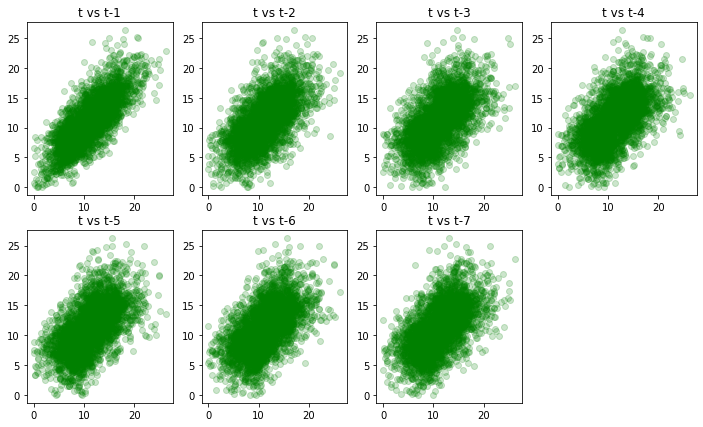

In [13]:
pyplot.figure(figsize = (12,7))
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values, alpha = 0.2, c = 'g')
    
pyplot.show()

## Autocorrelation Plot

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to
zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation. Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot

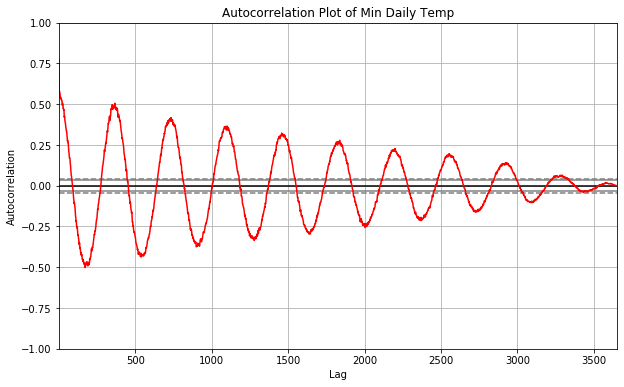

In [14]:
pyplot.figure(figsize = (10,6))
autocorrelation_plot(series, c = 'r')
pyplot.title('Autocorrelation Plot of Min Daily Temp')
pyplot.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). We can see that for the Minimum Daily Temperatures we see cycles of strong negative and positive correlation. This captures the relationship of an observation with
past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

## Types of Splits

## Train-Test Split

In [15]:
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 3650
Training Observations: 2409
Testing Observations: 1241


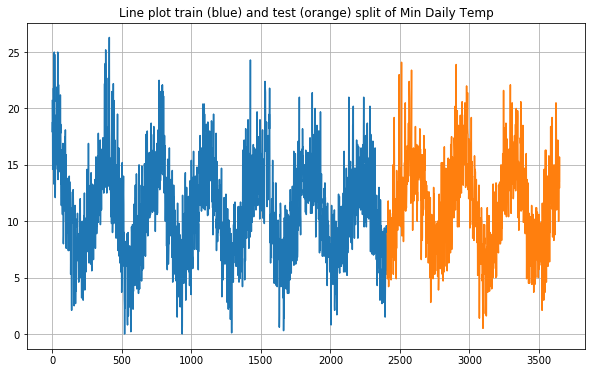

In [16]:
pyplot.figure(figsize = (10,6))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.title('Line plot train (blue) and test (orange) split of Min Daily Temp')
pyplot.grid()

## Multiple Train-Test Splits

Observations: 1826
Training Observations: 914
Testing Observations: 912
-----------------------------
Observations: 2738
Training Observations: 1826
Testing Observations: 912
-----------------------------
Observations: 3650
Training Observations: 2738
Testing Observations: 912
-----------------------------


<Figure size 432x288 with 0 Axes>

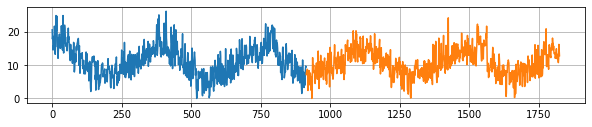

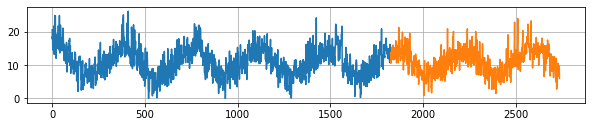

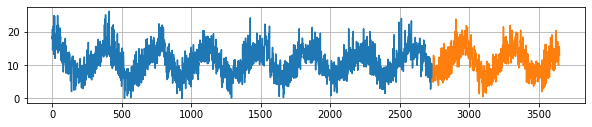

In [17]:
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    print('-----------------------------')
    pyplot.figure(figsize = (10,6))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    pyplot.grid()
    index += 1
pyplot.show()

## Baseline Model - Persistence Model

The most common baseline method for supervised machine learning is the Zero Rule algorithm.
This algorithm predicts the majority class in the case of classification, or the average outcome
in the case of regression. This could be used for time series, but does not respect the serial
correlation structure in time series datasets. The equivalent technique for use with time series
dataset is the persistence algorithm.

In [18]:
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [19]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [20]:
# persistence model
def model_persistence(x):
    return x

In [21]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.613


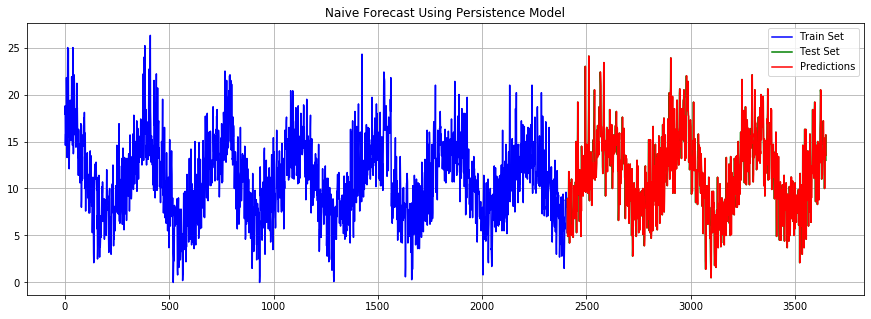

In [22]:
# plot predictions and expected results
pyplot.figure(figsize = (15,5))
pyplot.plot(train_y, c = 'b', label = 'Train Set')
pyplot.plot([None for i in train_y] + [x for x in test_y], c = 'g', label = 'Test Set')
pyplot.plot([None for i in train_y] + [x for x in predictions], c = 'r', label = 'Predictions')
pyplot.legend()
pyplot.title('Naive Forecast Using Persistence Model')
pyplot.grid()

The persistence algorithm is naive. It is often called the naive forecast. It
assumes nothing about the specifics of the time series problem to which it is applied. This is
what makes it so easy to understand and so quick to implement and evaluate.

In [23]:
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

     0
0  3.6
1 -0.2
2 -3.8
3  2.1
4  0.5


The first plot is to look at the residual forecast errors over time as a line plot. We would expect
the plot to be random around the value of 0 and not show any trend or cyclic structure.

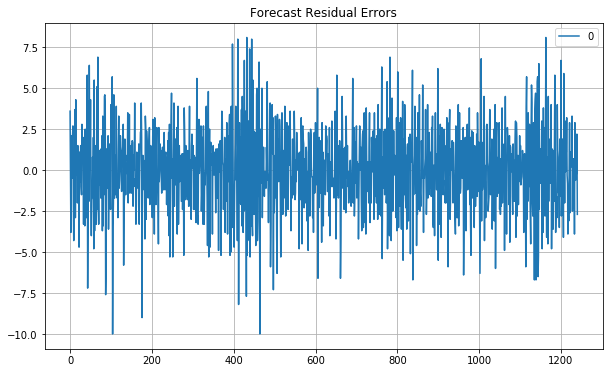

In [24]:
# plot residuals
residuals.plot(figsize = (10,6))
pyplot.title('Forecast Residual Errors')
pyplot.grid()

A value close to zero suggests no bias in the forecasts,
whereas positive and negative values suggest a positive or negative bias in the forecasts made.
It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior
to their use or evaluation.

In [25]:
print(residuals.describe())

                 0
count  1241.000000
mean      0.006205
std       2.613844
min     -10.000000
25%      -1.700000
50%       0.100000
75%       1.600000
max       8.100000


Running the example shows a mean error value close to zero, but perhaps not close enough.
It suggests that there may be some bias and that we may be able to further improve the model
by performing a bias correction. This could be done by adding the mean residual error (0.006205)
to forecasts.

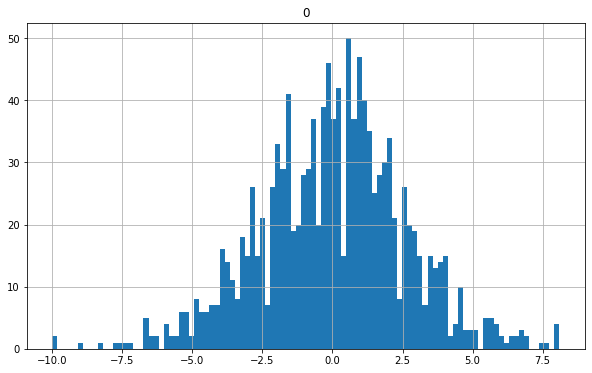

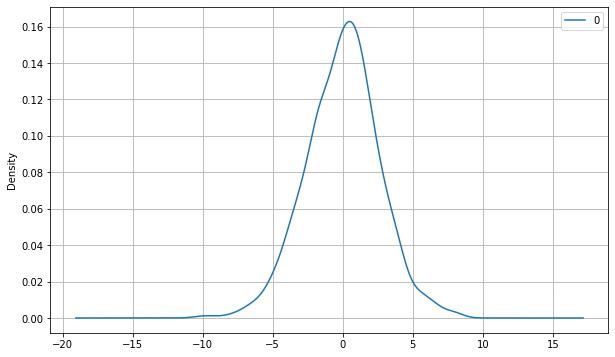

In [26]:
# histogram plot
residuals.hist(figsize = (10,6), bins = 100)
pyplot.show()

# density plot
residuals.plot(kind='kde', figsize = (10,6))
pyplot.grid()

We would expect the forecast errors to be normally distributed around a zero mean. Plots can
help discover skews in this distribution. We can use both histograms and density plots to better
understand the distribution of residual errors.

If the plot showed a distribution
that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling
process were perhaps incorrect and that a different modeling method may be required. A large
skew may suggest the opportunity for performing a transform to the data prior to modeling,
such as taking the log or square root.

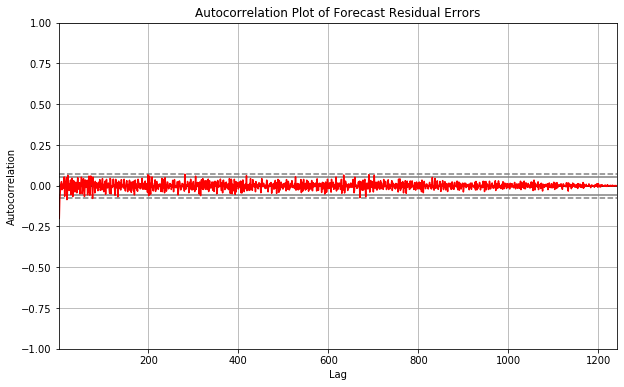

In [27]:
pyplot.figure(figsize = (10,6))
autocorrelation_plot(residuals, c = 'r')
pyplot.title('Autocorrelation Plot of Forecast Residual Errors')
pyplot.show()

We would not expect there to be
any correlation between the residuals. This would be shown by autocorrelation scores being
below the threshold of significance (dashed and dotted horizontal lines on the plot).

## ARIMA

In [28]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    
# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=3.977
ARIMA(0, 0, 1) RMSE=2.980
ARIMA(0, 1, 0) RMSE=2.613
ARIMA(0, 1, 1) RMSE=2.515
ARIMA(1, 0, 0) RMSE=2.468
ARIMA(1, 0, 1) RMSE=2.453
ARIMA(1, 1, 0) RMSE=2.570
ARIMA(1, 1, 1) RMSE=2.333
ARIMA(2, 0, 0) RMSE=2.460
ARIMA(2, 0, 1) RMSE=2.328
ARIMA(2, 1, 0) RMSE=2.495
ARIMA(2, 1, 1) RMSE=2.320
Best ARIMA(2, 1, 1) RMSE=2.320


## ARIMA Residuals

                 0
count  1241.000000
mean      0.048644
std       2.320301
min      -7.095073
25%      -1.428616
50%       0.046547
75%       1.532689
max       8.558086


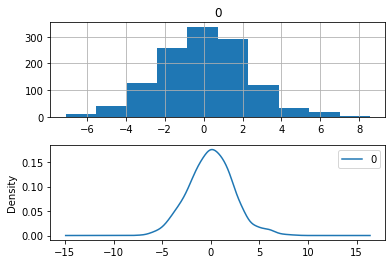

In [29]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(2,1,1)) #<---------------------------- FILL IN
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)

print(residuals.describe())

pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

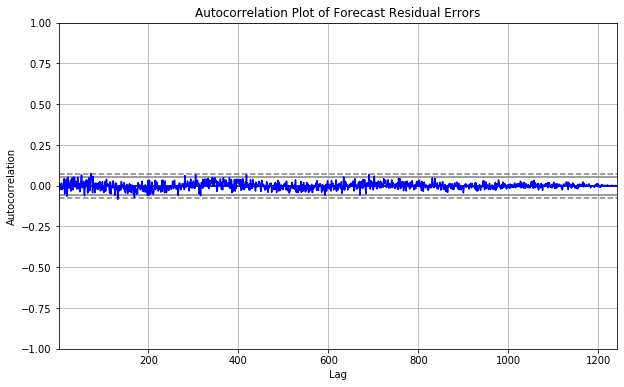

In [30]:
pyplot.figure(figsize = (10,6))
autocorrelation_plot(residuals, c = 'b')
pyplot.title('Autocorrelation Plot of Forecast Residual Errors')
pyplot.show()

## Rolling Prediction

predicted=5.939176, expected=8.900000
predicted=8.504212, expected=8.700000
predicted=7.935510, expected=4.900000
predicted=5.789173, expected=7.000000
predicted=7.453454, expected=7.500000
predicted=7.415954, expected=7.000000
predicted=7.058269, expected=9.100000
predicted=8.358292, expected=11.800000
predicted=9.743110, expected=9.900000
predicted=8.457814, expected=5.600000
predicted=6.313807, expected=4.200000
predicted=5.996193, expected=4.300000
predicted=6.061134, expected=8.000000
predicted=8.059430, expected=5.100000
predicted=5.828979, expected=9.400000
predicted=8.688529, expected=9.100000
predicted=7.996545, expected=9.700000
predicted=8.500495, expected=10.600000
predicted=9.069778, expected=8.600000
predicted=7.916212, expected=10.100000
predicted=9.140145, expected=11.000000
predicted=9.564376, expected=9.700000
predicted=8.815896, expected=5.000000
predicted=6.296662, expected=6.100000
predicted=7.451530, expected=5.400000
predicted=6.748306, expected=5.800000
predicte

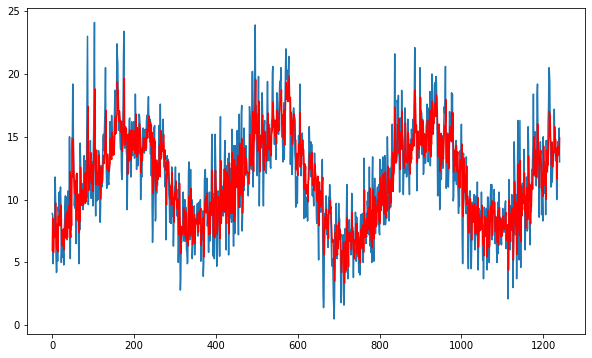

In [32]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1)) #<---------------------------- FILL IN
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.figure(figsize = (10,6))
pyplot.plot(test)
pyplot.grid()
pyplot.plot(predictions, color='red')
pyplot.grid()

## Example of One Forecast & the Confidence Intervals

In [33]:
# split data into train and test setes
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(2,1,1)) #<---------------------------- FILL IN
model_fit = model.fit(disp=False)
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
    forecast, stderr, conf = model_fit.forecast(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, conf[0][0], conf[0][1]))

80.0% Confidence Interval: 14.907 between 11.819 and 17.994
90.0% Confidence Interval: 14.907 between 10.944 and 18.869
95.0% Confidence Interval: 14.907 between 10.185 and 19.628
99.0% Confidence Interval: 14.907 between 8.701 and 21.112


## Visualise 95% Confidence Interval - Default Setting

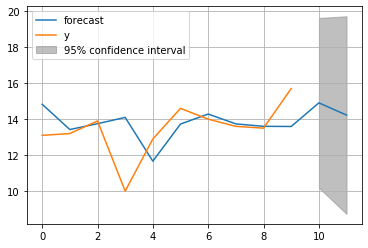

In [42]:
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(2,1,1)) #<---------------------------- FILL IN
model_fit = model.fit(disp=False)
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-10, len(train)+1)
pyplot.legend(loc='upper left')
pyplot.grid();

## Visualise 99% Confidence Interval

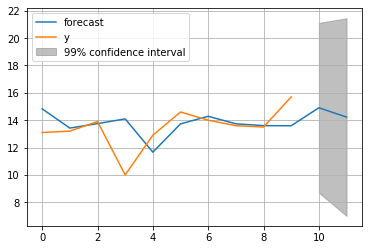

In [43]:
# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(2,1,1)) #<---------------------------- FILL IN
model_fit = model.fit(disp=False)
# plot some history and the forecast with confidence intervals
model_fit.plot_predict(len(train)-10, len(train)+1, alpha = 0.01)
pyplot.legend(loc='upper left')
pyplot.grid();